Done. You have the matrices PP QQ  RR  SS  WW.
  
Done. You have the matrices "Response" and "Response_named" 
which contain the models simulated reponses to
given values for the exogenous stochastic processes.
  
  
Here are the UNFILTERED SIMULATED series.
Total Simulation Length =  500
Number of Initial Values Discarded =  100
  
Response_named = 
[['investment      ' '-1.9008588103277702' '-2.3788446716537046' ...
  '0.6433458819755' '1.0997753142820783' '-1.0258695246487375']
 ['investment(t-1) ' '-1.3595407260247547' '-1.9008588103277726' ...
  '2.773852391198037' '0.6433458819755014' '1.0997753142820799']
 ['investment(t-2) ' '-2.5833207172042116' '-1.3595407260247612' ...
  '4.876750215446288' '2.773852391198038' '0.643345881975504']
 ...
 ['mu              ' '2.313257186083747' '1.7991095285888081' ...
  '-4.206505861234353' '-3.01308091013686' '-2.659916149834135']
 ['E_t[mu(t+1)]    ' '1.989477882536042' '1.983258002353344' ...
  '-2.9801178531346504' '-2.152678201059519' '-

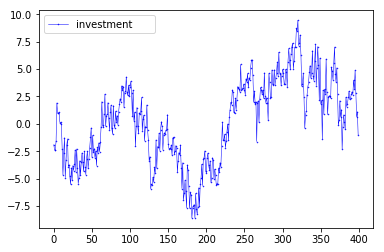

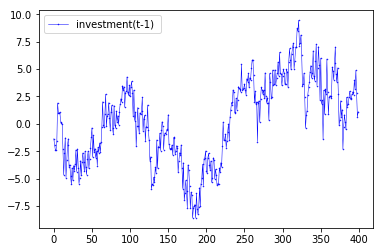

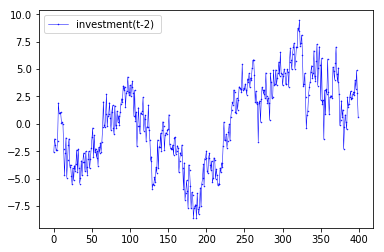

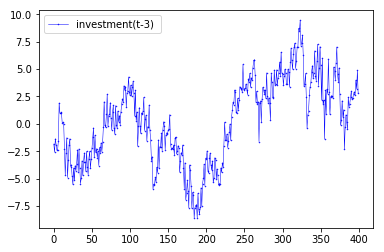

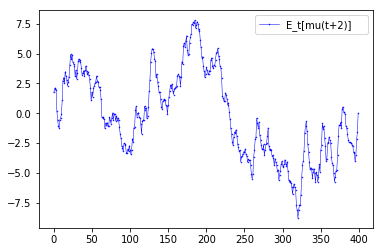

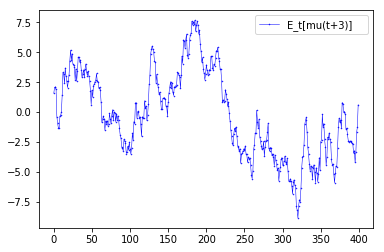

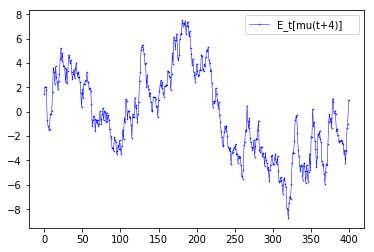

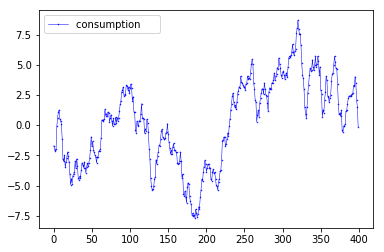

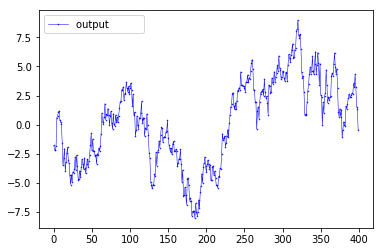

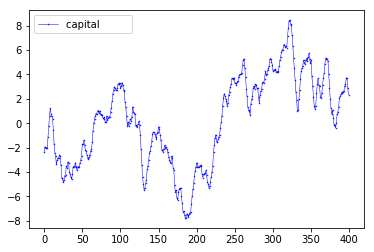

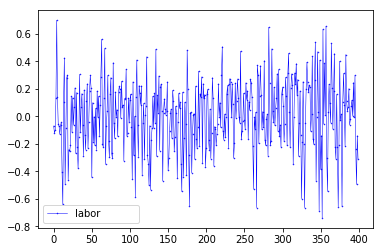

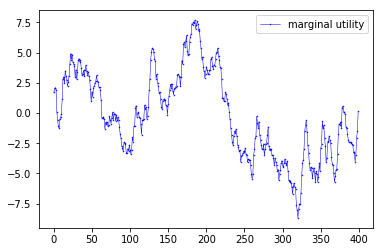

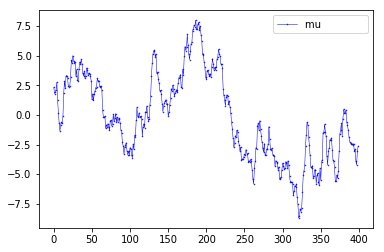

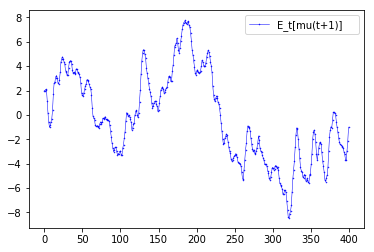

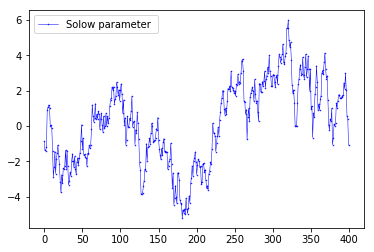

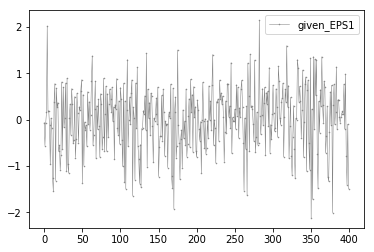

In [2]:
#  Uhlig's Exampl3.m
#  G. Hansen Indivisible Labor and Business Cycle (JME, 1985)
#   RBC Model with Time-to-Decay and Echo Effects

import numpy as np

N_bar     = 1.0/3
Z_bar     = 1
rho       = .36
R_bar     = 1.01
eta       = 1.0
psi       = .95
sigma_sigma = .712
p_echo    = 4

betta   = 1.0/R_bar
YK_bar  = (1- betta)/((1 - betta**p_echo)*betta*rho)
K_bar   = (YK_bar / Z_bar)**(1.0/(rho-1)) * N_bar
I_bar   = K_bar / p_echo
Y_bar   = YK_bar * K_bar
C_bar   = Y_bar - I_bar
Lam_bar = C_bar**(- eta)
Mu_bar  = rho*Lam_bar*YK_bar
A       = Lam_bar * (1 - rho) * Y_bar/N_bar


VARNAMES = ['investment      ',
            'investment(t-1) ',
            'investment(t-2) ',
            'investment(t-3) ',
            'E_t[mu(t+2)]    ',
            'E_t[mu(t+3)]    ',
            'E_t[mu(t+4)]    ',
            'consumption     ',
            'output          ',
            'capital         ',
            'labor           ',
            'marginal utility',
            'mu              ',
            'E_t[mu(t+1)]    ',
            'Solow parameter ']

AA = np.vstack(([ -I_bar, 0, 0, 0, 0, 0, 0], 
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 0, 0, 0, betta**2, betta**3, betta**4], 
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 1, 0, 0, 0, 0, 0],   
                          [0, 0, 1, 0, 0, 0, 0],   
                          [0, 0, 0, 1, 0, 0, 0]))


BB = np.vstack(([0, 0, 0, 0, 0, 0, 0], 
                          [1, 1, 1, 1, 0, 0, 0],  
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 0, 0, 0, 0, 0, 0],  
                          [0, 0, 0, 0, 0, 0, 0], 
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 0, 0, 0, 0, 0, 0],  
                         [-1, 0, 0, 0, 0, 0, 0],  
                          [0,-1, 0, 0, 0, 0, 0],   
                          [0, 0,-1, 0, 0, 0, 0]))

CC = np.vstack(([ -C_bar, Y_bar, 0, 0, 0, 0, 0],
                         [0, 0,-p_echo, 0, 0, 0, 0], 
                         [0, -1, rho, (1-rho), 0, 0, 0],            
                         [0, 1, 0, -1, 1, 0,  0],    
                         [0, 0, 0, 0, (-Lam_bar/Mu_bar), 0, betta],           
                         [0, 1, -1, 0, 1, -1, 0],
                         [eta, 0, 0, 0, 1, 0, 0],    
                         [0, 0, 0, 0, 0, 0, 0],         
                         [0, 0, 0, 0, 0, 0, 0],        
                         [0, 0, 0, 0, 0, 0, 0] ))   

DD = np.vstack(([0],
           [0],
           [1],
           [0],
           [0],
           [0],
           [0],
           [0],
           [0],
           [0]))

FF = np.vstack(([0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, -1, 0, 0],
                          [0, 0, 0, 0, 0,-1, 0]))

GG = np.vstack(([0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 1, 0, 0],
                          [0, 0, 0, 0, 0, 1, 0],
                          [0, 0, 0, 0, 0, 0, 1]))

HH = np.vstack(([0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0]))

JJ = np.vstack(([0, 0, 0, 0, 0, -1, 0],
                          [0, 0, 0, 0, 0, 0, -1],
                          [0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0]))

KK = np.vstack(([0, 0, 0, 0, 0, 0, 1],
                          [0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0]))

LL = np.vstack(([0],
                          [0],
                          [0],
                          [0]))

MM = np.vstack(([0],
                          [0],
                          [0],
                          [0]))

NN = [psi]

Sigma = [sigma_sigma**2]

Sigma_EPS = Sigma


%run Uhlig_solver_abreviated.ipynb

#print(' ')
#print('PP')
#print(PP.shape)
#print(PP)
#print(' ')
#print('RR')
#print(RR.shape)
#print(RR)
#print(' ')
#print('QQ')
#print(QQ.shape)
#print(QQ)
#print(' ')
#print('SS')
#print(SS.shape)
#print(SS)
#print(' ')


%run Uhlig_simul_rand.ipynb

%run Uhlig_plot_simul_all.ipynb

